<a href="https://colab.research.google.com/github/shhd-0/ML/blob/main/Decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahad164","key":"f61221b92555d23d2671c8af5615da4b"}'}

In [4]:
import os
import zipfile

# إنشاء مجلد .kaggle ووضع ملف json فيه
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [5]:
# تحميل مجموعة البيانات من Kaggle
!kaggle datasets download -d charlottebennett1234/lifestyle-factors-and-their-impact-on-students


Dataset URL: https://www.kaggle.com/datasets/charlottebennett1234/lifestyle-factors-and-their-impact-on-students
License(s): DbCL-1.0


In [6]:
# فك الضغط عن الملف
with zipfile.ZipFile("lifestyle-factors-and-their-impact-on-students.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [8]:
import pandas as pd

# قراءة الملف
df = pd.read_csv("data/student_lifestyle_dataset..csv")

# عرض أول 5 صفوف
df.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


In [10]:
print(data.columns)


Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'Stress_Level', 'Gender', 'Grades'],
      dtype='object')


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv("data/student_lifestyle_dataset..csv")

df.columns = df.columns.str.strip()

data = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))

X = data.drop('Grades', axis=1)
y = data['Grades']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error:", mse)
print("🧮 R² Score:", r2)




📉 Mean Squared Error: 0.68565425
🧮 R² Score: -0.17433868238982497


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

df = pd.read_csv("data/student_lifestyle_dataset..csv")

df.columns = df.columns.str.strip()

def convert_to_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

df['Grade_Class'] = df['Grades'].apply(convert_to_grade)

data = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))

X = data.drop(['Grades', 'Grade_Class'], axis=1)
y = data['Grade_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



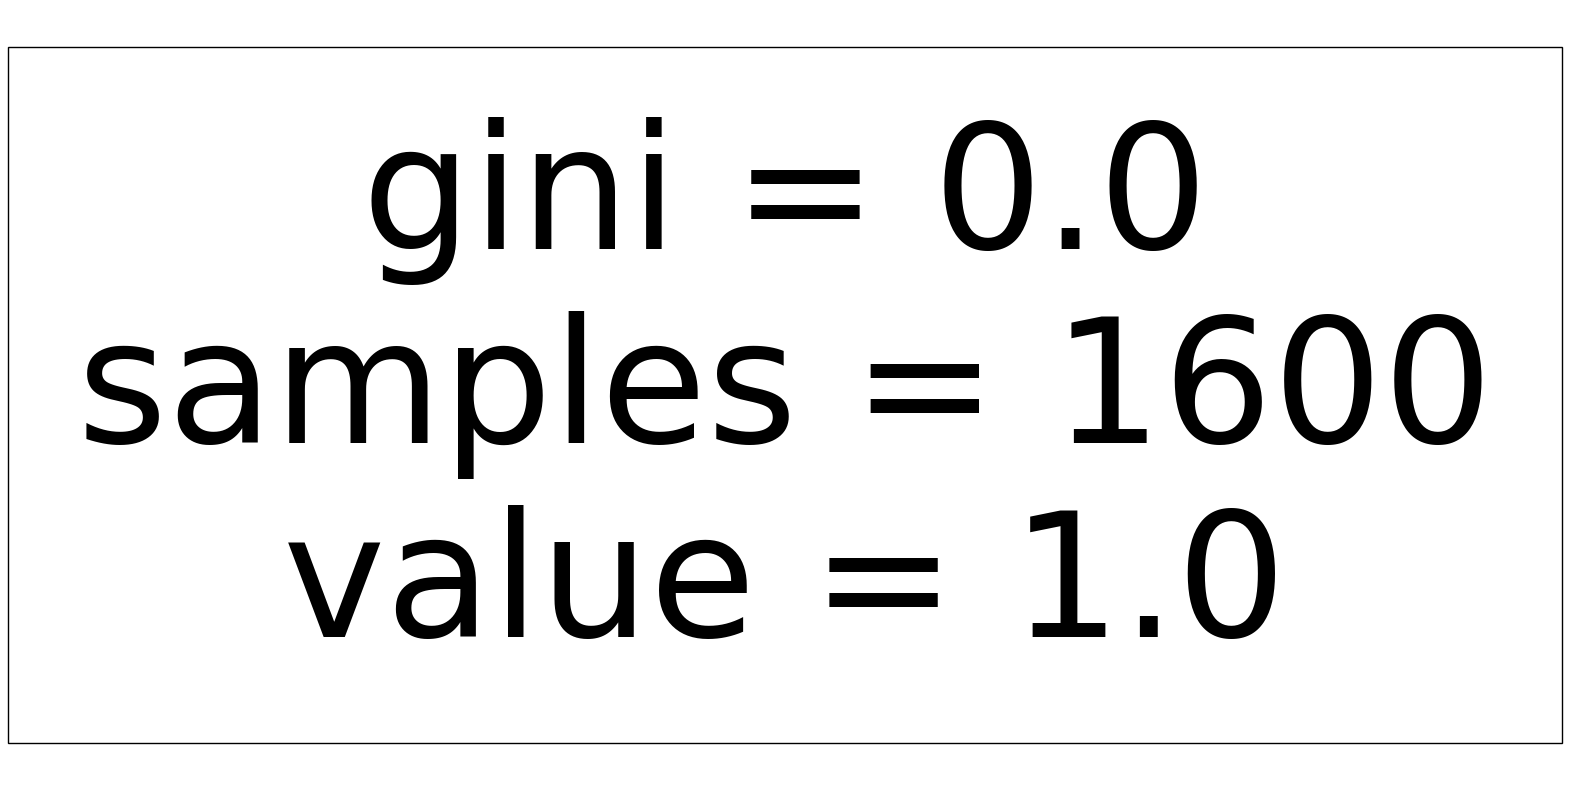

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()
